# Business Problem
The flight ticket price in India is based on demand and supply model with few restrictions on pricing from regulatory bodies. It is often perceived as unpredictable and , recent dynamic pricing scheme added to the confusion. 
The objective is to create a machine learning model for predicting the flight price, based on historical data, which can be used for reference price for customers as well as airline service providers

# Goal
Creating a machine learning for predicting flight ticket price with high accuracy. 

# Imports
** Import pandas, numpy, matplotlib,and seaborn.(we will import sklearn as we need it.)**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Get the Data
We have a data_train excel file which we are going to use to perform all the approriate tasks in creating the machine learning model.
It has various feature columns as follows:
    1.Airline: The name of the airline.
    2.Date_of_Journey: The date of the journey
    3.Source: The source from which the service begins.
    4.Destination: The destination where the service ends. 
    5.Route: The route taken by the flight to reach the destination.   
    6.Dep_Time: The time when the journey starts from the source.   
    7.Arrival_Time: Time of arrival at the destination.  
    8.Duration: Total duration of the flight.  
    9.Total_Stops: Total stops between the source and destination.   
    10.Additional_Info: Additional information about the flight Price:   
    11.The price of the ticket 

*Read the excel file in to a dataframe called flights

In [0]:
flights=pd.read_excel('Data_Train.xlsx')

*Check the Head of the flights and also info() methods

In [5]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis
Let's explore the data!

**As you can see in the info that all the columns in the dataframe except for the price are in string format so we need to convert our required column in to the appropriate one.

In [7]:
#clearing the missing data
flights.dropna(inplace=True)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

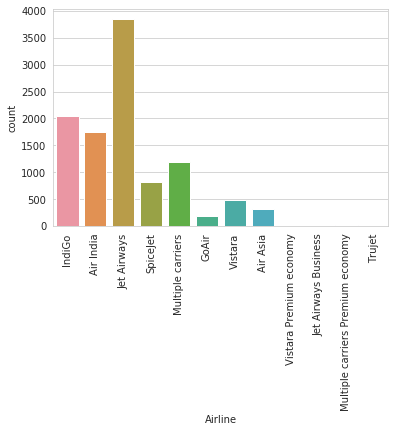

In [8]:
#Now lets check the count of the airlines in the visual graph
plot=plt.figure()
sns.countplot('Airline',data=flights)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

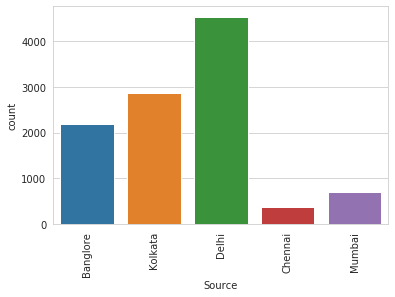

In [9]:
#Now lets check the count of the Source in the visual graph
plot=plt.figure()
sns.countplot('Source',data=flights)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

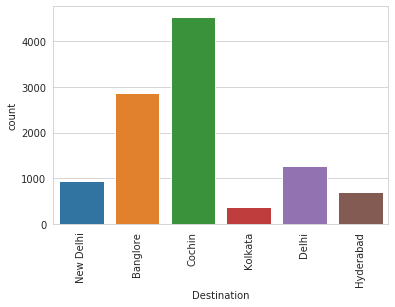

In [10]:
#Now lets check the count of the Destination in the visual graph
plot=plt.figure()
sns.countplot('Destination',data=flights)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

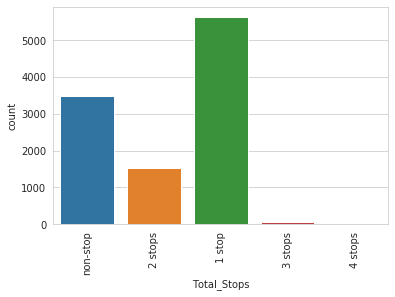

In [11]:
#Now lets check the count of the Total_Stops in the visual graph
plot=plt.figure()
sns.countplot('Total_Stops',data=flights)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

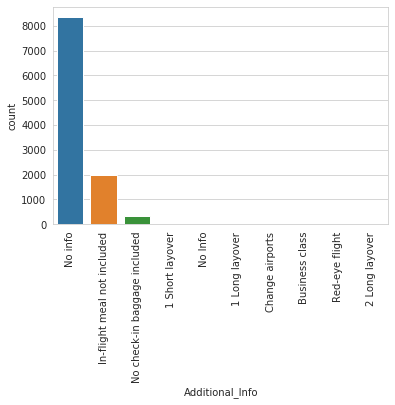

In [12]:
#Now lets check the count of the Additional_info in the visual graph
plot=plt.figure()
sns.countplot('Additional_Info',data=flights)
plt.xticks(rotation=90)

In [0]:
flights['Date_of_Journey']=pd.to_datetime(flights['Date_of_Journey'])
flights['Dep_Time']=pd.to_datetime(flights['Dep_Time'],format='%H:%M').dt.time

In [0]:
#As we can see that there are two 'no_info' columns we combine them
flights['Additional_Info']=flights['Additional_Info'].str.replace('No info','No Info')

In [0]:
#For the duration column which is in a hour and min format lets convert it into minutes using a equation 
flights['Duration']=flights['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
flights['Duration']=pd.to_numeric(flights['Duration'])

In [0]:
#we are converting the flights day to find which day it is in the week and storing it in the weekday column
flights['weekday']=flights[['Date_of_Journey']].apply(lambda x:x.dt.day_name())

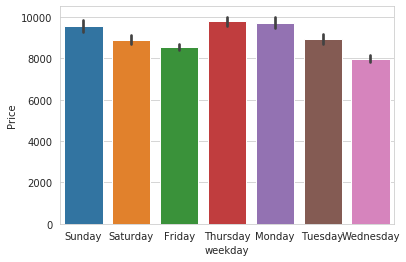

In [17]:
#now lets check the day of the journey relation with the output price column
sns.barplot('weekday','Price',data=flights)

In [0]:
#we are converting the flights date to find which month it is and storing it in the month column
flights["month"] = flights['Date_of_Journey'].map(lambda x: x.month_name())

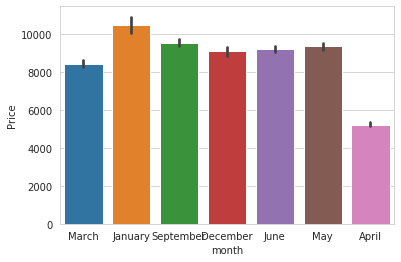

In [19]:
#now lets check the month of journey relation with the output price column
sns.barplot('month','Price',data=flights)

In [0]:
# we are taking the departure time hour column and converting it into a numeric
flights['Dep_Time']=flights['Dep_Time'].apply(lambda x:x.hour)
flights['Dep_Time']=pd.to_numeric(flights['Dep_Time'])

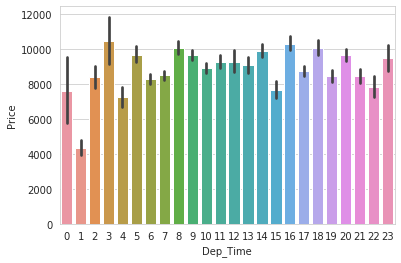

In [21]:
#now lets check the departure time relation with the output price column
sns.barplot('Dep_Time','Price',data=flights)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text xticklabel objects>)

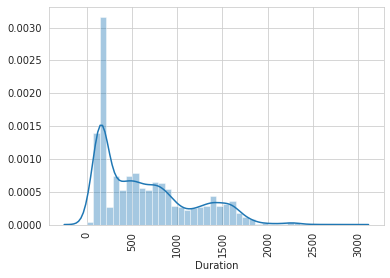

In [22]:
#Now lets check this Duration column in a histogram
plot=plt.figure()
sns.distplot(flights['Duration'],bins=40)
plt.xticks(rotation=90)

In [0]:
flights['Duration']=np.log(flights['Duration'])

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

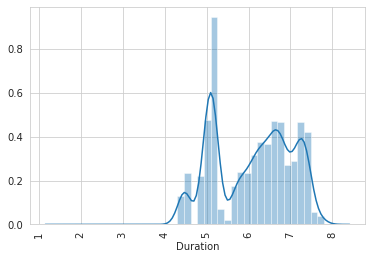

In [24]:
plot=plt.figure()
sns.distplot(flights['Duration'],bins=40)
plt.xticks(rotation=90)

In [25]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22,01:10 22 Mar,5.135798,non-stop,No Info,3897,Sunday,March
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,13:15,6.098074,2 stops,No Info,7662,Saturday,January
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,9,04:25 10 Jun,7.038784,2 stops,No Info,13882,Friday,September
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18,23:30,5.783825,1 stop,No Info,6218,Thursday,December
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16,21:35,5.652489,1 stop,No Info,13302,Thursday,January


In [0]:
#Now lets remove the irrelevant features
flights.drop(['Route','Arrival_Time','Date_of_Journey'],axis=1,inplace=True)

In [27]:
flights.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,Banglore,New Delhi,22,5.135798,non-stop,No Info,3897,Sunday,March
1,Air India,Kolkata,Banglore,5,6.098074,2 stops,No Info,7662,Saturday,January
2,Jet Airways,Delhi,Cochin,9,7.038784,2 stops,No Info,13882,Friday,September
3,IndiGo,Kolkata,Banglore,18,5.783825,1 stop,No Info,6218,Thursday,December
4,IndiGo,Banglore,New Delhi,16,5.652489,1 stop,No Info,13302,Thursday,January


In [0]:
#Now lets encode the inputs using label encoder
from sklearn.preprocessing import LabelEncoder
var_mod = ['Airline','Source','Destination','Additional_Info','Total_Stops','weekday','month','Dep_Time']
le = LabelEncoder()
for i in var_mod:
    flights[i] = le.fit_transform(flights[i])

In [29]:
flights.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,3,0,5,22,5.135798,4,6,3897,3,4
1,1,3,0,5,6.098074,1,6,7662,2,2
2,4,2,1,9,7.038784,1,6,13882,0,6
3,3,3,0,18,5.783825,0,6,6218,4,1
4,3,0,5,16,5.652489,0,6,13302,4,2


# Assigning Input and output variables

In [0]:
x=flights.drop('Price',axis=1)#taking all the other columns except price 
y=flights['Price']

# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#We are splitting the data in to two parts one is used to train the model and another is used to evaluate the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Building a model
** Importing the required regressions

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Defining the RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)

In [35]:
# Training the model
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Text(0.5, 0, 'Relative Importance')

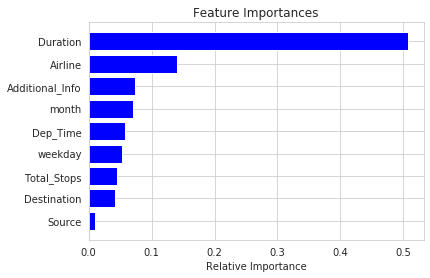

In [36]:
# In random forest we have a method to determine the feature importance in accordance with the relevance of the data
# lets check that once
features=x.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

** Now we can predict the data

In [0]:
predictions=rfr.predict(x_test)

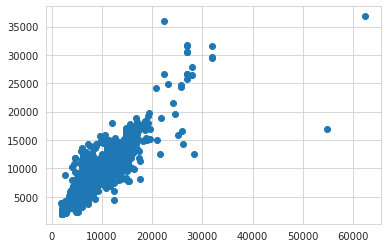

In [38]:
plt.scatter(y_test,predictions)

# Regression Evaluation Metrics

In [0]:
from sklearn import metrics

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', (metrics.r2_score(y_test, predictions)))

MAE: 992.8192100824747
MSE: 3839700.7193041984
RMSE: 1959.5154297183267
r2_score: 0.8232502798753852


# Residual Histogram

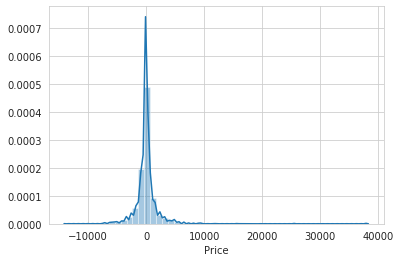

In [41]:
sns.distplot((y_test-predictions),bins=50)

**Applying Different regressions to check the r2_score to see which one is appropriate

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
from sklearn.metrics import r2_score,make_scorer

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
regg=[LinearRegression(),RandomForestRegressor(n_estimators=30),GradientBoostingRegressor(),ExtraTreesRegressor(n_estimators=30),SVR(),DecisionTreeRegressor()]

In [46]:
mean=[]
std=[]
for i in regg:
    cvs=cross_val_score(i,x,y,cv=5,scoring=make_scorer(r2_score),verbose=1,n_jobs=-1)
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   24.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


In [47]:
for i in range(6):
    print(regg[i].__class__.__name__,':',mean[i])

LinearRegression : 0.4127322917031381
RandomForestRegressor : 0.8017029948777769
GradientBoostingRegressor : 0.7596729063507107
ExtraTreesRegressor : 0.812027735190816
SVR : -0.005885352031139779
DecisionTreeRegressor : 0.6745081472443598


**From this we can infer that Random Forest regressor is giving the highest R2_score so lets test our data with Random Forest regressor

# Applying the regressions on a new test data file

In [0]:
test_file=pd.read_excel('Test_set.xlsx')

In [49]:
test_file.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


**Converting the dataframe in to our 

In [0]:
test_file['Date_of_Journey']=pd.to_datetime(test_file['Date_of_Journey'])
test_file['Dep_Time']=pd.to_datetime(test_file['Dep_Time'],format='%H:%M').dt.time
test_file['Duration']=test_file['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_file['Duration']=pd.to_numeric(test_file['Duration'])
test_file['Dep_Time']=test_file['Dep_Time'].apply(lambda x:x.hour)
test_file['Dep_Time']=pd.to_numeric(test_file['Dep_Time'])
test_file["month"] = test_file['Date_of_Journey'].map(lambda x: x.month_name())
test_file['weekday']=test_file[['Date_of_Journey']].apply(lambda x:x.dt.day_name())
test_file['Additional_Info']=test_file['Additional_Info'].str.replace('No info','No Info')
test_file.drop(['Date_of_Journey','Route','Arrival_Time'],axis=1,inplace=True)
for i in var_mod:
    test_file[i]=le.fit_transform(test_file[i])

In [0]:
test_price_predictions=rfr.predict(test_file)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]), <a list of 9 Text xticklabel objects>)

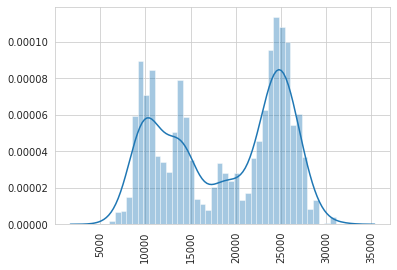

In [53]:
plot=plt.figure()
sns.distplot(test_price_predictions,bins=40)
plt.xticks(rotation=90)

# Conclusion

From the Analysis of the above data set we have predicted the price of a flight in particular to the given features with a accuracy of 73 percent as shown above.

Applying a Deep Learning model


In [0]:
#Importing required Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

In [56]:
x_train.shape

(8545, 9)

In [57]:
y_train.shape

(8545,)

In [58]:
x_test.shape

(2137, 9)

In [88]:
flight_model = Sequential()

# The Input Layer :
flight_model.add(Dense(256, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
flight_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
flight_model.add(Dropout(0.3))
flight_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
flight_model.add(Dropout(0.5))
flight_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
flight_model.add(Dropout(0.3))

# The Output Layer :
flight_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
flight_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
flight_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)              

In [89]:
m=flight_model.fit(x_train, y_train, epochs=40, batch_size=128, validation_split = 0.2)

Train on 6836 samples, validate on 1709 samples
Epoch 1/40
6836/6836 [==============================] - 1s 129us/step - loss: 6486.3169 - mean_absolute_percentage_error: 75.0659 - val_loss: 3627.1863 - val_mean_absolute_percentage_error: 45.0642
Epoch 2/40
6836/6836 [==============================] - 0s 52us/step - loss: 3476.0998 - mean_absolute_percentage_error: 47.6125 - val_loss: 2909.4439 - val_mean_absolute_percentage_error: 38.7046
Epoch 3/40
6836/6836 [==============================] - 0s 59us/step - loss: 2831.8056 - mean_absolute_percentage_error: 35.0151 - val_loss: 2473.6983 - val_mean_absolute_percentage_error: 29.3441
Epoch 4/40
6836/6836 [==============================] - 0s 58us/step - loss: 2587.5803 - mean_absolute_percentage_error: 30.9728 - val_loss: 2415.3754 - val_mean_absolute_percentage_error: 28.2400
Epoch 5/40
6836/6836 [==============================] - 0s 55us/step - loss: 2605.8121 - mean_absolute_percentage_error: 30.3285 - val_loss: 2423.2768 - val_mean_a

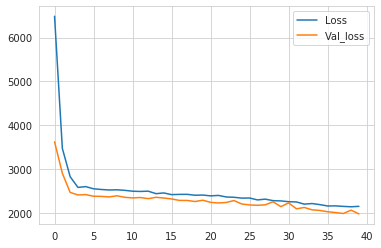

In [90]:
plt.plot(m.history['loss'],label='Loss')
plt.plot(m.history['val_loss'],label='Val_loss')
plt.legend()

In [92]:
score=flight_model.evaluate(x_test,y_test)

2137/2137 [==============================] - 0s 54us/step


In [93]:
score

[2003.6642765943056, 23.193386423292147]

we have 'test_file' for the input data used to test case for the price prediction  

In [0]:
test_pred=flight_model.predict_on_batch(test_file)